In [1]:
# EDA
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('vader_lexicon')
import string
from spacy.tokens import Doc
nltk.download('averaged_perceptron_tagger')
from nltk import tokenize # fast sentence tokenization
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import spacy #natural language processing
import en_core_web_sm
import re
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cindyhuang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/cindyhuang/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cindyhuang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cindyhuang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/cindyhuang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df = pd.read_excel("/content/drive/MyDrive/Data Science for PM/Diabetes Continuous Glucose Monitoring – Data Export.xlsx")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df = pd.read_excel("Diabetes Continuous Glucose Monitoring – Data Export.xlsx")
df.shape

(37844, 63)

## EDA

In this section, we conducted analysis for the following steps:
1. Inspect columns
2. Summary statistics 
3. Check missing values
4. Check outliers

__1. Columns__
1. We removed columns that only have missing values
2. We removed columns that are not informative (with too many missing values and/or too granular information)

In [4]:
df.head()

Post ID  \
0   BRDRDT2-t1_imq98sr   
1   BRDRDT2-t1_impbcf4   
2  1565738759353602048   
3    17944607459251789   
4   BRDRDT2-t1_imq8h9m   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Sound Bite Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have no idea how to feel, react, etc, i'm always here as a resource. i use a dexcom g6 and the omnipod system (and desperately trying to upgrade to the new closed loop omnipod system!)   
3  MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carrots, apples, and macadamia nuts. Mixed it together and drizzled briannas_salad Real French Vinaigrette Dressing. When my kids see people eating alone they always say they feel bad for them. I tell them they are probably enjoying themselves. Yep, we are enjoying ourselves ??\nSIMPLE SIMPLE food! Very little insulin required, especially since I’ve been outside in the heat for hours and going back out ☀️\n\n#t1d #type1diabetes #typeonediabetes #diabetes #diabetesawareness #lowcarb #keto #easyrecipes #easylunch #lunchalone #momlife #momfood #type1mom #typeonemom #fitmom #selfcare #healthymom #cgm #dexcom #looping #insulin #bloodsugar #dominatingtype1diabetes   
4                                     

In [5]:
# Removing all columns that are completely blank
df=df.dropna(axis=1, how='all')
df.shape

(37844, 39)

__2. Summary Statistics__

In [6]:
# numerical columns
df.describe().transpose()

count           mean  \
Followers/Daily Unique Visitors/Subscribers  30820.0  433775.763400   
Richness                                     37844.0       1.903393   
Total Engagements                              618.0      55.522654   
Post Comments                                  413.0       6.237288   
Post Likes                                     594.0      53.429293   
Rating                                         113.0       2.657522   

                                                      std  min      25%  \
Followers/Daily Unique Visitors/Subscribers  3.093652e+06  1.0  21671.5   
Richness                                     1.725630e+00  0.0      0.0   
Total Engagements                            2.695147e+02  1.0      5.0   
Post Comments                                1.696275e+01  1.0      1.0   
Post Likes                                   2.700113e+02  1.0      4.0   
Rating                                       1.712236e+00  1.0      1.0   

                                                 50%       75%         max  
Followers/Daily Unique Visitors/Subscribers  38617.0  78519.00  42298115.0  
Richness                                         2.0      3.00        15.0  
Total Engagements                               12.0     31.00      5782.0  
Post Comments                                    3.0      6.00       308.0  
Post Likes                                      11.0     28.75      5720.0  
Rating                                           2.0      5.00         5.0

In [7]:
# unique values counts
for col in df[['Source Type', 'Post Type',
       'Is Paid', 'Media Type', 'Domain', 'Sentiment','Professions', 'Interests', 
       'Richness', 'Source Name']]:
       print(df[col].value_counts())

Forums       34795
Blogs         1489
Twitter        826
Instagram      630
Comments        85
Facebook        19
Name: Source Type, dtype: int64
Replies and Comments    29892
Original                 5273
Name: Post Type, dtype: int64
No    37844
Name: Is Paid, dtype: int64
No Media              34826
Link                   1765
Image                  1065
Link; Image              86
Video                    60
Video; Image             33
Link; Video               6
Video; Link               1
Link; Video; Image        1
Video; Link; Image        1
Name: Media Type, dtype: int64
reddit.com                                         33690
twitter.com                                          826
instagram.com                                        630
forum.tudiabetes.org                                 209
community.whattoexpect.com                           146
diabetesdaily.com                                    143
apps.apple.com                                        73
community.baby

__Based on the preliminary insepction, we have the following thoughts.__

Additional columns to drop: 

1) the values are uniform across the dataset and thus the column is not informative (['Is Paid'])

2) the column may not be useful for our analysis due to too many missing values, or due to the nature of the information (['Media Type', 'Author Location - Country 1', 'Author Location - State/Province 1','Author Location - City 1', 'Author Location - Country 2','Author Location - State/Province 2', 'Author Location - City 2', 'Author URL', 'Author Handle', 'Author Gender';'Professions', 'Interests', 'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle', 'URL', 'Media Link', 'Author ID'])

Observations:

1) None of the posts in this dataset is paid

2) Source type

3) Domain (reddit most)

4) Sentiment

5) Source name (x% has diabetes-related xx)



In [8]:
# List of the columns to drop
to_drop = ['Media Type', 'Author Location - Country 1', 'Author Location - State/Province 1','Author Location - City 1', 'Author Location - Country 2',
           'Author Location - State/Province 2', 'Author Location - City 2', 'Author URL', 'Author Handle', 'Author Gender',
           'Professions', 'Interests', 'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle', 'URL', 'Media Link', 'Author ID']

In [9]:
# Drop the columns specified
df = df.drop(to_drop, axis = 1)
df.columns

Index(['Post ID', 'Sound Bite Text', 'Title', 'Source Type', 'Post Type',
       'Is Paid', 'Domain', 'Sentiment', 'Published Date (GMT-04:00) New York',
       'Author Name', 'Author Reddit Karma',
       'Followers/Daily Unique Visitors/Subscribers', 'Positive Objects',
       'Negative Objects', 'Richness', 'Total Engagements', 'Post Comments',
       'Post Likes', 'Reddit Score', 'Rating', 'Source Name'],
      dtype='object')

__3. Missing values__

In [10]:
df.isna().sum()

Post ID                                            0
Sound Bite Text                                    0
Title                                           1571
Source Type                                        0
Post Type                                       2679
Is Paid                                            0
Domain                                             0
Sentiment                                          0
Published Date (GMT-04:00) New York                0
Author Name                                      955
Author Reddit Karma                                0
Followers/Daily Unique Visitors/Subscribers     7024
Positive Objects                               29039
Negative Objects                               33297
Richness                                           0
Total Engagements                              37226
Post Comments                                  37431
Post Likes                                     37250
Reddit Score                                  

__4. Distribution and Outliers__

In [11]:
# Continuous features
# Function to detect outlier values that are outside given standard deviations
def std_outlier_test(df, threshold=3):
    std = np.std(df)
    mean = np.mean(df)
    lb, ub = (-threshold*std+mean, threshold*std+mean)
    mask = (df<lb) | (df>ub)
    print("The outlier thresholds are: %f, %f" % (lb, ub))
    print("The number of outliers is: %d" % len(df[mask]))
    return lb, ub, df[mask]

# Define function to plot distribution and identify outliers
def plot_outlier_test(df, col, threshold = 3):
    # 3 standard deviations away from mean
    lb, ub, outliers = std_outlier_test(df[col], threshold)
    #lb, ub, outliers = iqr_outlier_test(df, col, 3)

    fig, ax = plt.subplots(1,2, figsize = (10, 4))
    sns.histplot(data = df, x = col, bins = 20, ax = ax[0])
    sns.boxplot(data = df, x = col, ax = ax[1])
    plt.axvline(x = lb, color = 'red', linestyle = '--')
    plt.axvline(x = ub, color = 'red', linestyle = '--')
    plt.title('Distribution of %s' % col)
    plt.show()
    return outliers

In [12]:
# Categorical features

# Define function to print value counts and count plot
def plot_categories(df, col):
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))

    sns.countplot(x=df[col])
    plt.title('Distribution of %s' % col)
    plt.show()
    return

In [13]:
pd.to_datetime(df['Published Date (GMT-04:00) New York'])

0       2022-09-01 19:41:36
1       2022-09-01 15:53:47
2       2022-09-02 12:29:44
3       2022-09-01 14:20:21
4       2022-09-01 19:35:52
5       2022-08-31 18:59:06
6       2022-09-01 20:46:59
7       2022-09-02 03:50:23
8       2022-09-01 18:06:24
9       2022-09-01 15:49:55
10      2022-09-02 01:36:36
11      2022-09-01 21:14:01
12      2022-09-01 21:25:14
13      2022-09-02 13:06:09
14      2022-09-01 15:35:23
15      2022-09-01 14:12:29
16      2022-09-02 11:14:42
17      2022-09-02 13:16:59
18      2022-09-01 18:11:52
19      2022-09-01 15:44:12
20      2022-09-02 13:11:16
21      2022-09-01 23:18:17
22      2022-09-01 19:36:40
23      2022-09-02 09:56:43
24      2022-09-02 11:54:10
25      2022-09-01 14:27:17
26      2022-09-01 15:32:12
27      2022-09-01 17:19:52
28      2022-09-01 20:30:22
29      2022-09-02 13:00:25
30      2022-09-01 22:34:00
31      2022-09-02 10:34:22
32      2022-09-02 12:27:30
33      2022-09-02 10:07:14
34      2022-09-02 12:45:47
35      2022-09-01 1

In [14]:
# Date features

# Define function to plot count by distribution
def plot_dates(df, col):
  df[col] = pd.to_datetime(df[col])
  df['Month'] = df[col].map(lambda dt: dt.strftime('%Y-%m'))
  grouped_df = df.groupby('Month').size().to_frame("count").reset_index()
  grouped_df.plot(kind='bar', x='Month', y='count')
  plt.show()

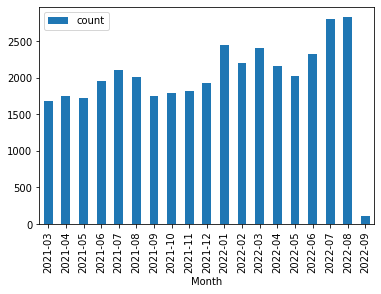

In [15]:
plot_dates(df, 'Published Date (GMT-04:00) New York')

### 1. General CGM analysis
What are consumers saying about CGMs? 

In [16]:
df.head()

Post ID  \
0   BRDRDT2-t1_imq98sr   
1   BRDRDT2-t1_impbcf4   
2  1565738759353602048   
3    17944607459251789   
4   BRDRDT2-t1_imq8h9m   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Sound Bite Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    My numbers are great now. Estimated a1c of 7%ish. He doesn't care what i say, he wants the actual labs and will not look at my dexcom stuff or take my word for it.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       I tried it for a little while. No side effects and it did help with insulin resistance in the AM. I have found tandom and dexcom to be superior.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    i ran out of characters. youtu.be/RWgl2PDhQiM i'll also say if you are newly diagnosed and have no idea how to feel, react, etc, i'm always here as a resource. i use a dexcom g6 and the omnipod system (and desperately trying to upgrade to the new closed loop omnipod system!)   
3  MY lunch! Ate at 10:30am \n1 unit NovoLog insulin via pump \nGrilled chicken, feta cheese, carrots, apples, and macadamia nuts. Mixed it together and drizzled briannas_salad Real French Vinaigrette Dressing. When my kids see people eating alone they always say they feel bad for them. I tell them they are probably enjoying themselves. Yep, we are enjoying ourselves ??\nSIMPLE SIMPLE food! Very little insulin required, especially since I’ve been outside in the heat for hours and going back out ☀️\n\n#t1d #type1diabetes #typeonediabetes #diabetes #diabetesawareness #lowcarb #keto #easyrecipes #easylunch #lunchalone #momlife #momfood #type1mom #typeonemom #fitmom #selfcare #healthymom #cgm #dexcom #looping #insulin #bloodsugar #dominatingtype1diabetes   
4                                     

### Tokenization

### Remove Stop words and URL

In [17]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer() 
nlp = spacy.load('en_core_web_sm')
text = df['Sound Bite Text']+ df['Title'].fillna()

# tokenize tweets with NTLK's TweetTokenizer
cleaned_tweets = []
for tw in text:
    # create list of tokenized words excluding stop words 
    cleaned = [word for word in tknzr.tokenize(tw.lower()) if word not in nlp.Defaults.stop_words 
               and len(word) > 2]
    cleaned_tweets.append(' '.join(cleaned))
    
# remove http urls in tweets
urlfree_tweets = []
for tweet in cleaned_tweets:
    tweet = tweet.strip()
    urlfree = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "", tweet)
    urlfree_tweets.append(urlfree)

In [18]:
df['clean_text'] = urlfree_tweets

In [19]:
def getCategory(tw):
    if 'dexcom' in tw.lower():
        if 'freestyle' in tw.lower() or 'libre' in tw.lower():
            return 'both'
        else:
            return 'dexcom'
    elif 'freestyle' in tw.lower() or 'libre' in tw.lower():
        return 'libre'
    else:
        return 'none'

In [20]:
# Group tweets by subject: dexcom or libre
dexcom_text = []
libre_text = []
both_text = []
none_text = []
libre_indices = []
both_indices = []
none_indices = []
dexcom_indices = []


# for text in urlfree_tweets
for index in range(len(urlfree_tweets)):
    subject = getCategory(urlfree_tweets[index].lower())
    if subject == 'dexcom':
        dexcom_indices.append(index)
        dexcom_text.append(urlfree_tweets[index])
    elif subject == 'libre':
        libre_text.append(urlfree_tweets[index])
        libre_indices.append(index)
    elif subject == 'both':
        both_text.append(urlfree_tweets[index])
        both_indices.append(index)
    else:
        none_text.append(urlfree_tweets[index])
        none_indices.append(index)

In [21]:
print("No. of irrelevant text: ",len(none_text))
print("No. of Freestyle Libre only text: ",len(libre_text))
print("No. of Dexcom only text: ",len(dexcom_text))
print("No. of mixed text: ",len(both_text))

No. of irrelevant text:  14906
No. of Freestyle Libre only text:  4190
No. of Dexcom only text:  16281
No. of mixed text:  2467


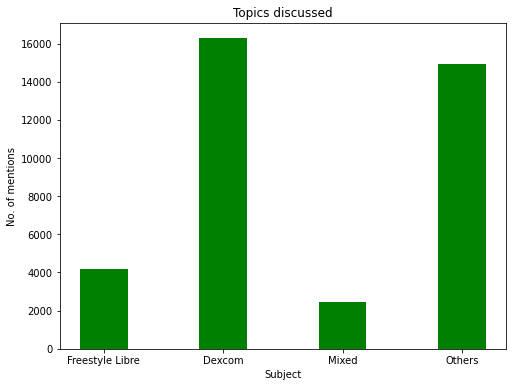

In [168]:
text_distribution = {'Freestyle Libre':len(libre_text), 'Dexcom': len(dexcom_text), 'Mixed':len(both_text),
        'Others':len(none_text)}
text_type = list(text_distribution.keys())
values = list(text_distribution.values())
  
fig = plt.figure(figsize = (8, 6))
 
# creating the bar plot
plt.bar(text_type, values, color ='green',
        width = 0.4)
 
plt.xlabel("Subject")
plt.ylabel("No. of mentions")
plt.title("Topics discussed")
plt.show()

In [23]:
# filter dateframe based on topic
libre_df = df.filter(items = libre_indices, axis=0)
dexcom_df = df.filter(items = dexcom_indices, axis=0)
both_df = df.filter(items = both_indices, axis=0)
irre_df = df.filter(items = none_indices, axis=0)

In [188]:
irre_df.head()

Post ID  \
4   BRDRDT2-t1_imq8h9m   
6   BRDRDT2-t1_imqhyj5   
8   BRDRDT2-t1_impvxki   
11  BRDRDT2-t1_imqljix   
12  BRDRDT2-t1_imqn0gp   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Sound Bite Text  \
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              This is also because like a soak in a hot tub the potential exists for lowered blood sugar. My doctor told me when I was 10 that I should never stay in a hot tub for more than 15 minutes because it can lower glucose levels to dangerous regions. I have never payed attention to that but if I am in a hot tub I keep a close eye on my CGM because it does lower my level some.   
6                                                                                                                                                                                                                                        I am a insulin dependent diabetic (type 1, T1D) and have gone through various control methods, needles to pens then a pump and eventually a pump that is closed loop controlled by a continuous blood glucose meter (CGM). Each shift in treatment improved convenience considerably especially the closed loop control system I use now. A pill would be a step backwards since it would be more like the pen which is a manual process. I can see this being slightly more useful for once a day long lasting insulins but this isn’t going to replace pump therapy since it is a manual method and can’t be algorithmically controlled.   
8                                                                                                                                                                                                                                                                                                                                         It depends on what insurance I have at that time. Last year we had United healthcare and I had to pay my $6,000 deductible before they would cover anything and then just for my CGM and insulin pump supplies it was about $4,000 every 3 months. We have Blue Cross now and they pay a little more but it's hard to get the supplies in a timely manner. Just went without some supplies for a month. But then again United healthcare would pay for my eye injections so I don't go blind but Blue Cross doesn't want to pay for that.   
11                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Common words removal

In [24]:
words_to_remove = ['dexcom', 'freestyle', 'libre']

def remove_common_words(raw_text):
    cleaned_text = []
    for tw in raw_text:
        cleaned = [word for word in tknzr.tokenize(tw.lower()) if word not in words_to_remove 
               and len(word) > 2]
        cleaned_text.append(' '.join(cleaned))
    return cleaned_text

In [122]:
libre_df['clean_text'] = remove_common_words(libre_df['clean_text'])
dexcom_df['clean_text'] = remove_common_words(dexcom_df['clean_text'])
both_df['clean_text'] = remove_common_words(both_df['clean_text'])

### Lemmatization

In [125]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatize(raw_text):
    lemmatized = []
    for tweet in raw_text:
        doc = nlp(tweet)
        lemmatized.append(" ".join([token.lemma_ for token in doc]))
    return lemmatized
# df['lemmatized_text'] = lemmatized

libre_df['lemmatized_text'] = lemmatize(libre_df['clean_text'])
dexcom_df['lemmatized_text'] = lemmatize(dexcom_df['clean_text'])
both_df['lemmatized_text'] = lemmatize(both_df['clean_text'])
irre_df['lemmatized_text'] = lemmatize(irre_df['clean_text'])

In [126]:
# filter freestyle libre data based on sentiments
positive_libre = libre_df[libre_df['Sentiment'] == "Positives"]
negative_libre = libre_df[libre_df['Sentiment'] == "Negatives"]
neutral_libre = libre_df[libre_df['Sentiment'] == "Neutrals"]
mixed_libre = libre_df[libre_df['Sentiment'] == "Mixed"]

# filter dexcom data based on sentiments
positive_dexcom = dexcom_df[dexcom_df['Sentiment'] == "Positives"]
negative_dexcom = dexcom_df[dexcom_df['Sentiment'] == "Negatives"]
neutral_dexcom = dexcom_df[dexcom_df['Sentiment'] == "Neutrals"]
mixed_dexcom = dexcom_df[dexcom_df['Sentiment'] == "Mixed"]

# filter data mentioning both dexcom and freestyle data based on sentiments
positive_both = both_df[both_df['Sentiment'] == "Positives"]
negative_both = both_df[both_df['Sentiment'] == "Negatives"]
neutral_both = both_df[both_df['Sentiment'] == "Neutrals"]
mixed_both = both_df[both_df['Sentiment'] == "Mixed"]

# filter other data based on sentiments
positive_none = irre_df[irre_df['Sentiment'] == "Positives"]
negative_none = irre_df[irre_df['Sentiment'] == "Negatives"]
neutral_none = irre_df[irre_df['Sentiment'] == "Neutrals"]
mixed_none = irre_df[irre_df['Sentiment'] == "Mixed"]

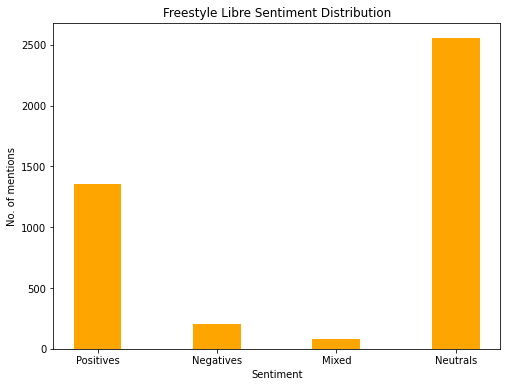

In [165]:
libre_distribution = {'Positives':len(positive_libre), 'Negatives': len(negative_libre), 'Mixed':len(mixed_libre),
        'Neutrals':len(neutral_libre)}
text_type = list(libre_distribution.keys())
values = list(libre_distribution.values())
  
fig = plt.figure(figsize = (8, 6))
 
# creating the bar plot
plt.bar(text_type, values, color ='orange',
        width = 0.4)
 
plt.xlabel("Sentiment")
plt.ylabel("No. of mentions")
plt.title("Freestyle Libre Sentiment Distribution")
plt.show()

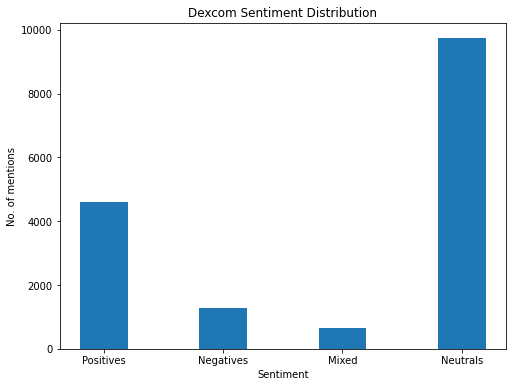

In [166]:
dexcom_distribution = {'Positives':len(positive_dexcom), 'Negatives': len(negative_dexcom), 'Mixed':len(mixed_dexcom),
        'Neutrals':len(neutral_dexcom)}
text_type = list(dexcom_distribution.keys())
values = list(dexcom_distribution.values())
  
fig = plt.figure(figsize = (8, 6))
 
# creating the bar plot
plt.bar(text_type, values,
        width = 0.4)
plt.xlabel("Sentiment")
plt.ylabel("No. of mentions")
plt.title("Dexcom Sentiment Distribution")
plt.show()

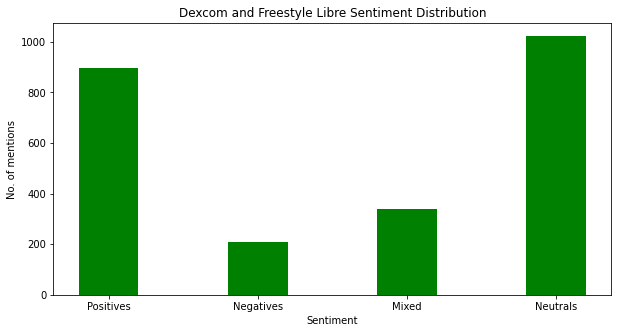

In [66]:
both_distribution = {'Positives':len(positive_both), 'Negatives': len(negative_both), 'Mixed':len(mixed_both),
        'Neutrals':len(neutral_both)}
text_type = list(both_distribution.keys())
values = list(both_distribution.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(text_type, values,
        width = 0.4, color='green')
plt.xlabel("Sentiment")
plt.ylabel("No. of mentions")
plt.title("Dexcom and Freestyle Libre Sentiment Distribution")
plt.show()

### Part of Speech Tagging

In [67]:
def countPOS(clean_text):
    adj = []
    noun = []
    verb = []
    all_words = []
    for tweet in clean_text:
        for token in nlp(tweet.lower()):
            all_words.append(token.text)
            if token.pos_ == 'ADJ':
                adj.append(token.text)
            elif token.pos_ == 'NOUN':
                noun.append(token.text)
            elif token.pos_ == 'VERB':
                verb.append(token.text)
    return adj, noun, verb, all_words

In [68]:
libre_adj, libre_noun, libre_verb, libre_all = countPOS(cleaned_libre)

In [69]:
dexcom_adj, dexcom_noun, dexcom_verb, dexcom_all = countPOS(cleaned_dexcom)

In [70]:
both_adj, both_noun, both_verb, both_all = countPOS(cleaned_both)

In [71]:
irre_adj, irre_noun, irre_verb, irre_all = countPOS(none_text)

In [72]:
# pass list of libre related adjectives, nouns, verbs, and all words into counter 
libre_adj_counter = Counter(libre_adj)
libre_noun_counter =  Counter(libre_noun)
libre_verb_counter = Counter(libre_verb)
libre_allwords_counter = Counter(libre_all)

# pass list of dexcom related adjectives, nouns, verbs, and all words into counter 
dexcom_adj_counter = Counter(dexcom_adj)
dexcom_noun_counter =  Counter(dexcom_noun)
dexcom_verb_counter = Counter(dexcom_verb)
dexcom_allwords_counter = Counter(dexcom_all)

# pass list of dexcom and libre related adjectives, nouns, verbs, and all words into counter 
both_adj_counter = Counter(both_adj)
both_noun_counter =  Counter(both_noun)
both_verb_counter = Counter(both_verb)
both_allwords_counter = Counter(both_all)

# pass list of un-related adjectives, nouns, verbs, and all words into counter 
irre_adj_counter = Counter(irre_adj)
irre_noun_counter =  Counter(irre_noun)
irre_verb_counter = Counter(irre_verb)
irre_allwords_counter = Counter(irre_all)

In [73]:
print("Libre-related text: \n")
print("Top 10 overall most common verbs:")
for lemma, count in libre_allwords_counter.most_common()[:10]:
    print(lemma,':', count)
    
print("\nTop 10 overall most common adjective:")
for lemma, count in libre_adj_counter.most_common()[:10]:
    print(lemma,':', count)
    
print("\nTop 10 overall most common noun:")
for lemma, count in libre_noun_counter.most_common()[:10]:
    print(lemma,':', count)
    

print("\nTop 10 overall most common verb:")
for lemma, count in libre_verb_counter.most_common()[:10]:
    print(lemma,':', count)

Libre-related text: 

Top 10 overall most common verbs:
# : 2325
cgm : 2003
glucose : 1845
i : 1501
blood : 1429
sensor : 1302
use : 1292
- : 1276
n't : 1268
's : 1076

Top 10 overall most common adjective:
low : 535
continuous : 500
diabetic : 378
new : 354
good : 353
high : 348
able : 311
free : 308
medical : 252
different : 235

Top 10 overall most common noun:
glucose : 1730
blood : 1428
sensor : 1279
sugar : 962
day : 880
time : 818
insulin : 731
diabetes : 724
use : 626
levels : 594

Top 10 overall most common verb:
use : 652
got : 525
know : 481
think : 369
getting : 349
going : 336
need : 333
having : 329
started : 313
want : 284


## Dexcom

In [74]:
print("Dexcom-related text: \n")
print("Top 10 overall most common words:")
for lemma, count in dexcom_allwords_counter.most_common()[:10]:
    print(lemma,':', count)
    
print("\nTop 10 overall most common adjective:")
for lemma, count in dexcom_adj_counter.most_common()[:10]:
    print(lemma,':', count)
    
print("\nTop 10 overall most common noun:")
for lemma, count in dexcom_noun_counter.most_common()[:10]:
    print(lemma,':', count)
    

print("\nTop 10 overall most common verb:")
for lemma, count in dexcom_verb_counter.most_common()[:10]:
    print(lemma,':', count)
    

Dexcom-related text: 

Top 10 overall most common words:
i : 5945
pump : 5125
n't : 4534
# : 4118
cgm : 4078
's : 3807
like : 3756
- : 3243
use : 3220
'm : 3154

Top 10 overall most common adjective:
low : 2023
new : 1672
good : 1504
medtronic : 1116
high : 1114
omnipod : 1006
able : 952
better : 915
great : 854
sure : 719

Top 10 overall most common noun:
pump : 4071
time : 3017
insulin : 2921
sensor : 2568
years : 2342
blood : 2259
day : 1942
sugar : 1795
phone : 1693
insurance : 1686

Top 10 overall most common verb:
got : 2177
know : 1578
use : 1564
going : 1483
think : 1395
getting : 1297
having : 1271
feel : 1040
want : 1007
need : 991


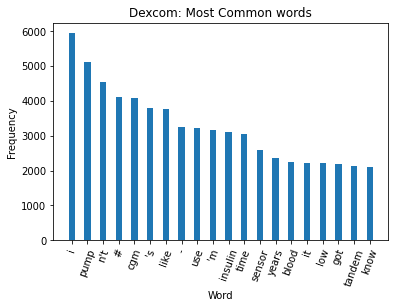

In [75]:
dexcom_most_common = dexcom_allwords_counter.most_common()[:20]

entity_label = [i[0] for i in dexcom_most_common]
frequency = [i[1] for i in dexcom_most_common]
plt.bar(entity_label, frequency,
        width = 0.4)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('Dexcom: Most Common words')
plt.show()

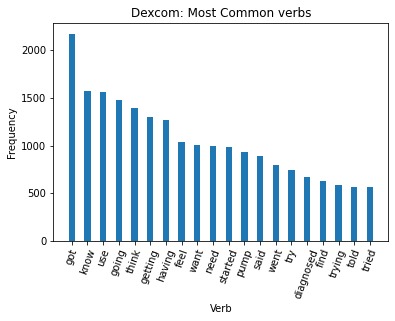

In [76]:
dexcom_most_common_verb = dexcom_verb_counter.most_common()[:20]
entity_label = [i[0] for i in dexcom_most_common_verb]
frequency = [i[1] for i in dexcom_most_common_verb]
plt.bar(entity_label, frequency,
        width = 0.4)
plt.xlabel('Verb')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('Dexcom: Most Common verbs')
plt.show()

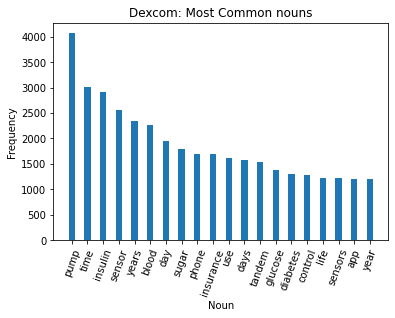

In [77]:
dexcom_most_common_noun = dexcom_noun_counter.most_common()[:20]
entity_label = [i[0] for i in dexcom_most_common_noun]
frequency = [i[1] for i in dexcom_most_common_noun]
plt.bar(entity_label, frequency,
        width = 0.4)
plt.xlabel('Noun')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('Dexcom: Most Common nouns')
plt.show()

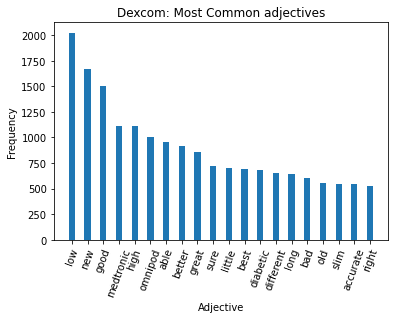

In [78]:
dexcom_most_common_adj = dexcom_adj_counter.most_common()[:20]
entity_label = [i[0] for i in dexcom_most_common_adj]
frequency = [i[1] for i in dexcom_most_common_adj]
plt.bar(entity_label, frequency,
        width = 0.4)
plt.xlabel('Adjective')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('Dexcom: Most Common adjectives')
plt.show()

Dexcom Word cloud:


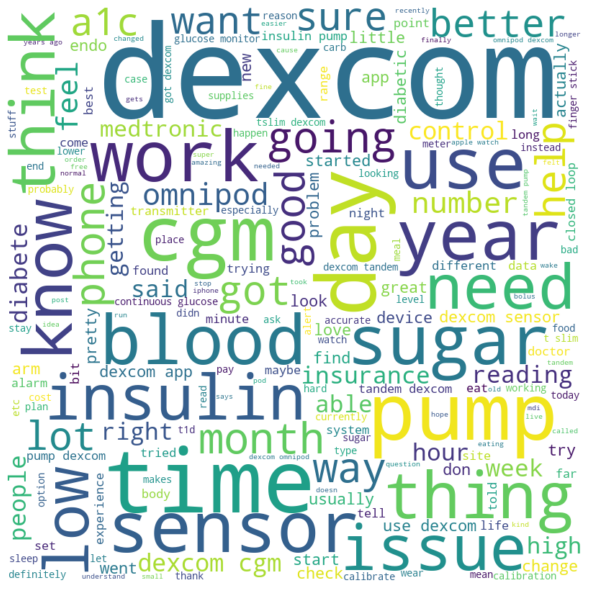

In [79]:
dexcom_common_words = ""
# for val in dexcom_text:
for val in dexcom_text:
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    dexcom_common_words += " ".join(tokens)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(dexcom_common_words)
# plot the WordCloud image                      
print("Dexcom Word cloud:")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Freestyle Libre

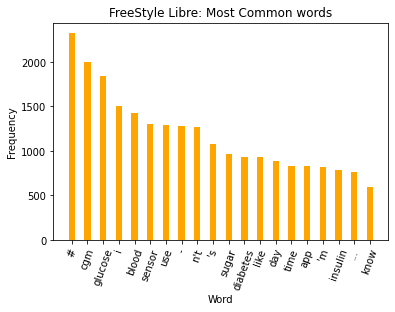

In [80]:
libre_most_common_word = libre_allwords_counter.most_common()[:20]
entity_label = [i[0] for i in libre_most_common_word]
frequency = [i[1] for i in libre_most_common_word]
plt.bar(entity_label, frequency,
        width = 0.4, color="orange")
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('FreeStyle Libre: Most Common words')
plt.show()

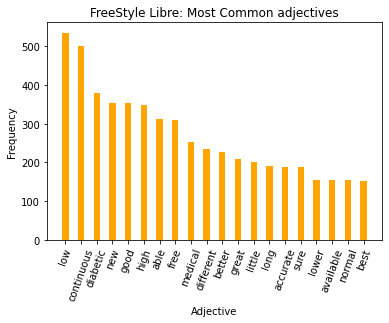

In [81]:
libre_most_common_adj = libre_adj_counter.most_common()[:20]
entity_label = [i[0] for i in libre_most_common_adj]
frequency = [i[1] for i in libre_most_common_adj]
plt.bar(entity_label, frequency,
        width = 0.4,color="orange")
plt.xlabel('Adjective')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('FreeStyle Libre: Most Common adjectives')
plt.show()

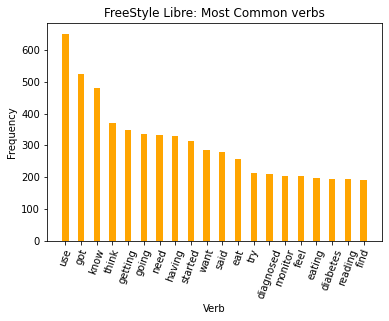

In [82]:
libre_most_common_verb = libre_verb_counter.most_common()[:20]
entity_label = [i[0] for i in libre_most_common_verb]
frequency = [i[1] for i in libre_most_common_verb]
plt.bar(entity_label, frequency,
        width = 0.4, color="orange")
plt.xlabel('Verb')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('FreeStyle Libre: Most Common verbs')
plt.show()

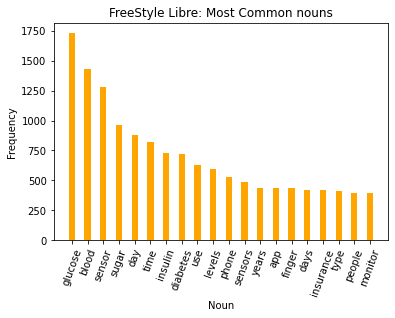

In [83]:
libre_most_common_noun = libre_noun_counter.most_common()[:20]
entity_label = [i[0] for i in libre_most_common_noun]
frequency = [i[1] for i in libre_most_common_noun]
plt.bar(entity_label, frequency,
        width = 0.4, color="orange")
plt.xlabel('Noun')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('FreeStyle Libre: Most Common nouns')
plt.show()

Freestyle Libre Word cloud:


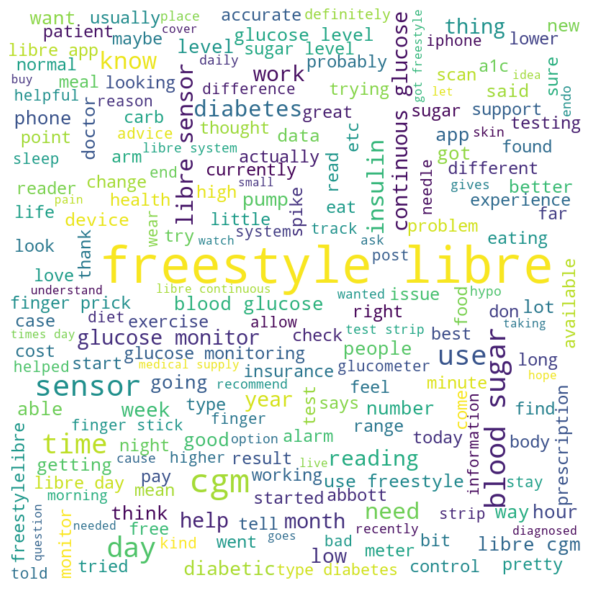

In [186]:
libre_common_words = ""
for val in libre_text:
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    libre_common_words += " ".join(tokens)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(libre_common_words)
# plot the WordCloud image                      
print('\033[1m' + "Freestyle Libre Word cloud:")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Freestyle Libre and Dexcom Word cloud:


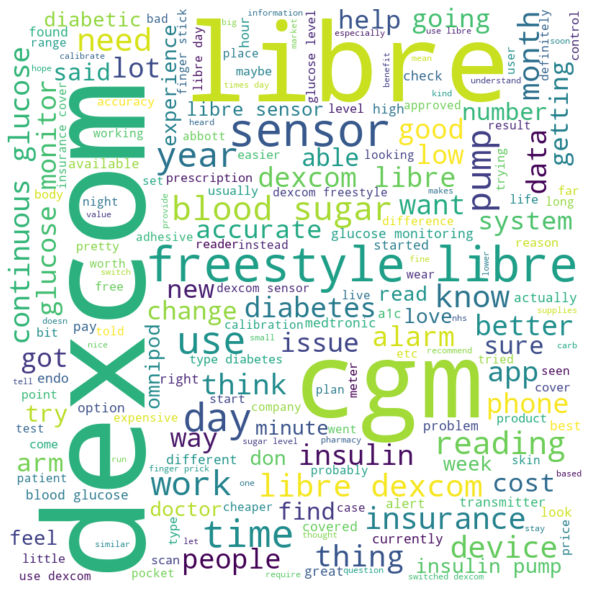

In [85]:
both_common_words = ""
for val in both_text:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    both_common_words += " ".join(tokens)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(both_common_words)
# plot the WordCloud image                      
print("Freestyle Libre and Dexcom Word cloud:")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Other Topics Word cloud:


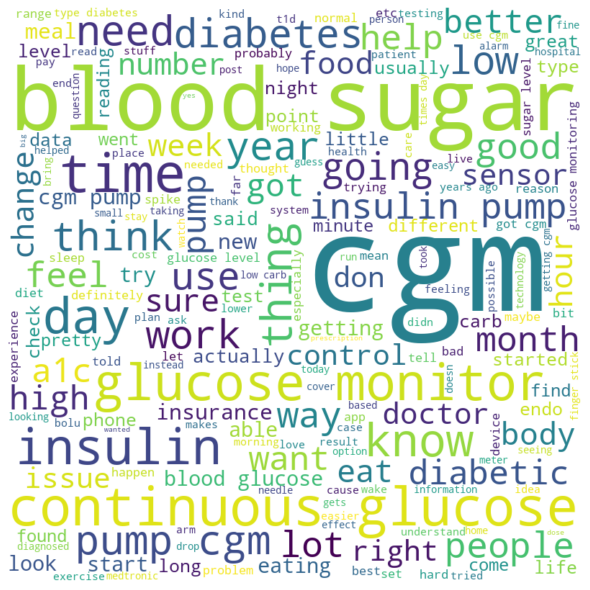

In [86]:
irrelevant_common_words = ""
for val in none_text:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    irrelevant_common_words += " ".join(tokens)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(irrelevant_common_words)
# plot the WordCloud image                      
print("Other Topics Word cloud:")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Bag of words

#### Bigram and Trigram

In [87]:
# do bigram and trigram for positive, negative and neutral sentiments 
from sklearn.feature_extraction.text import CountVectorizer
c_2_vec = CountVectorizer(stop_words=None, ngram_range=(2,2))
c_3_vec = CountVectorizer(stop_words=None, ngram_range=(3,3))

In [88]:
# Freestyle Libre general bigram 
libre_2ngrams = c_2_vec.fit_transform(libre_df['lemmatized_text'])
libre_2_count_values = libre_2ngrams.toarray().sum(axis=0)
libre_vocab = c_2_vec.vocabulary_

libre_2ngram = pd.DataFrame(sorted([(libre_2_count_values[i],k) for k,i in libre_vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

libre_2ngram = libre_2ngram.sort_values(by=['frequency'], ascending=False)

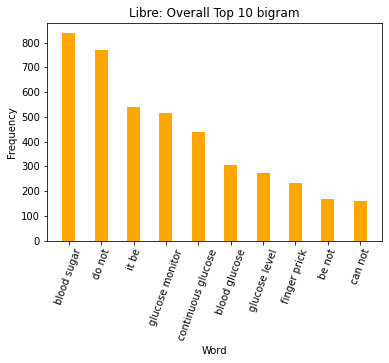

In [89]:
# Freestyle Libre bigram visualization
libre_most_common_bigram = libre_2ngram[:10]
frequency = libre_most_common_bigram['frequency']
label = libre_most_common_bigram['bigram']
plt.bar(label, frequency,
        width = 0.4, color='orange')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('Libre: Overall Top 10 bigram')
plt.show()

In [90]:
# Freestyle Libre general trigram 
libre_3ngrams = c_3_vec.fit_transform(libre_df['lemmatized_text'])
libre_3_count_values = libre_3ngrams.toarray().sum(axis=0)
libre_3_vocab = c_3_vec.vocabulary_

libre_3ngram = pd.DataFrame(sorted([(libre_3_count_values[i],k) for k,i in libre_3_vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

libre_3ngram = libre_3ngram.sort_values(by=['frequency'], ascending=False)

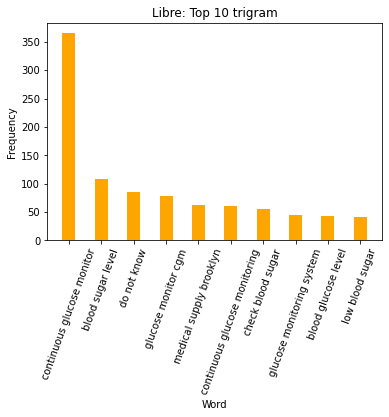

In [91]:
# Freestyle Libre general trigram visualization
libre_most_common_trigram = libre_3ngram[:10]
frequency = libre_most_common_trigram['frequency']
label = libre_most_common_trigram['trigram']
plt.bar(label, frequency,
        width = 0.4, color='orange')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('Libre: Top 10 trigram')
plt.show()

In [92]:
# Dexcom general bigram 
dexcom_2ngrams = c_2_vec.fit_transform(dexcom_df['lemmatized_text'])
dexcom_2_count_values = dexcom_2ngrams.toarray().sum(axis=0)
dexcom_2_vocab = c_2_vec.vocabulary_

dexcom_2ngrams = pd.DataFrame(sorted([(dexcom_2_count_values[i],k) for k,i in dexcom_2_vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

dexcom_2ngrams = dexcom_2ngrams.sort_values(by=['frequency'], ascending=False)

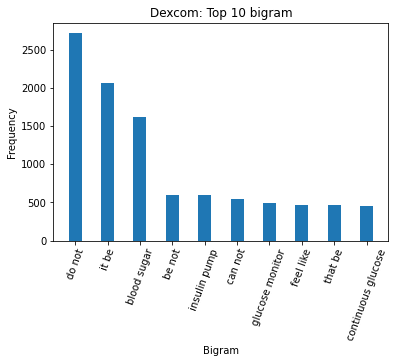

In [93]:
# Dexcom general bigram visualization
dexcom_most_common_bigram = dexcom_2ngrams[:10]
frequency = dexcom_most_common_bigram['frequency']
label = dexcom_most_common_bigram['bigram']
plt.bar(label, frequency,
        width = 0.4)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.title('Dexcom: Top 10 bigram')
plt.show()

In [94]:
# Dexcom general trigram 
dexcom_3ngrams = c_3_vec.fit_transform(dexcom_df['lemmatized_text'])
dexcom_3_count_values = dexcom_3ngrams.toarray().sum(axis=0)
dexcom_3_vocab = c_3_vec.vocabulary_

dexcom_3ngrams = pd.DataFrame(sorted([(dexcom_3_count_values[i],k) for k,i in dexcom_3_vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

dexcom_3ngrams = dexcom_3ngrams.sort_values(by=['frequency'], ascending=False)

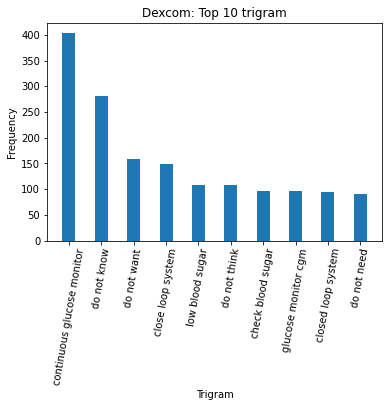

In [95]:
# Dexcom general trigram visualization
dexcom_most_common_trigram = dexcom_3ngrams[:10]
frequency = dexcom_most_common_trigram['frequency']
label = dexcom_most_common_trigram['trigram']
plt.bar(label, frequency,
        width = 0.4)
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.title('Dexcom: Top 10 trigram')
plt.show()

#### Sentiment bigram and trigram

### Positive Sentiment

In [96]:
# matrix of ngrams
positive_libre_2ngrams = c_2_vec.fit_transform(positive_libre['lemmatized_text'])
positive_libre_3ngrams = c_3_vec.fit_transform(positive_libre['lemmatized_text'])

# count frequency of ngrams
pos2_libre_count_values = positive_libre_2ngrams.toarray().sum(axis=0)
pos3_libre_count_values = positive_libre_3ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_2_vec.vocabulary_
vocab3 = c_3_vec.vocabulary_
positive_libre_2ngram = pd.DataFrame(sorted([(pos2_libre_count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

positive_libre_3ngram = pd.DataFrame(sorted([(pos3_libre_count_values[i],k) for k,i in vocab3.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

positive_libre_2ngram = positive_libre_2ngram.sort_values(by=['frequency'], ascending=False)
positive_libre_3ngram = positive_libre_3ngram.sort_values(by=['frequency'], ascending=False)

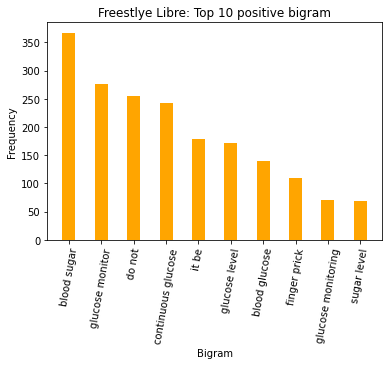

In [97]:
# Freestyle Libre positive bigram visualization
libre_positive_most_common_bigram = positive_libre_2ngram[:10]
frequency = libre_positive_most_common_bigram['frequency']
label = libre_positive_most_common_bigram['bigram']
plt.barh(label, frequency,
        width = 0.4, color='orange')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.title('Freestlye Libre: Top 10 positive bigram')
plt.show()

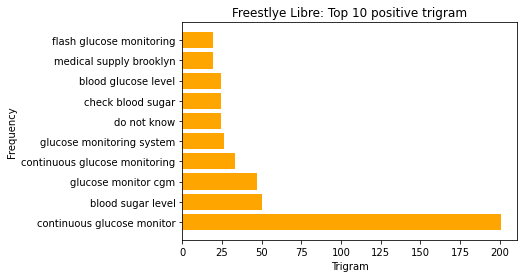

In [212]:
# Freestyle Libre positive bigram visualization
libre_positive_most_common_trigram = positive_libre_3ngram[:10]
frequency = libre_positive_most_common_trigram['frequency']
label = libre_positive_most_common_trigram['trigram']
plt.barh(label, frequency,color='orange')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
# plt.xticks(rotation=80)
plt.title('Freestlye Libre: Top 10 positive trigram')
plt.show()

In [99]:
# matrix of ngrams
positive_dexcom_2ngrams = c_2_vec.fit_transform(positive_dexcom['lemmatized_text'])
positive_dexcom_3ngrams = c_3_vec.fit_transform(positive_dexcom['lemmatized_text'])

# count frequency of ngrams
pos2_dexcom_count_values = positive_dexcom_2ngrams.toarray().sum(axis=0)
pos3_dexcom_count_values = positive_dexcom_3ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_2_vec.vocabulary_
vocab3 = c_3_vec.vocabulary_
positive_dexcom_2ngram = pd.DataFrame(sorted([(pos2_dexcom_count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

positive_dexcom_3ngram = pd.DataFrame(sorted([(pos3_dexcom_count_values[i],k) for k,i in vocab3.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

positive_dexcom_2ngram = positive_dexcom_2ngram.sort_values(by=['frequency'], ascending=False)
positive_dexcom_3ngram = positive_dexcom_3ngram.sort_values(by=['frequency'], ascending=False)

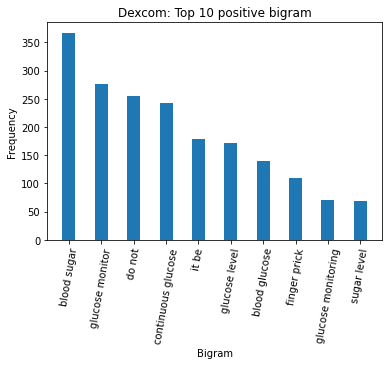

In [100]:
# Dexcom positive bigram visualization
dexcom_positive_most_common_bigram = positive_libre_2ngram[:10]
frequency = dexcom_positive_most_common_bigram['frequency']
label = dexcom_positive_most_common_bigram['bigram']
plt.bar(label, frequency,
        width = 0.4)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.title('Dexcom: Top 10 positive bigram')
plt.show()

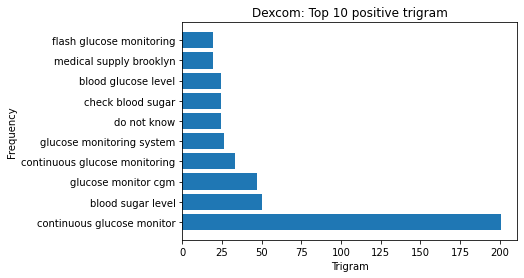

In [214]:
# Dexcom positive trigram visualization
dexcom_positive_most_common_trigram = positive_libre_3ngram[:10]
frequency = dexcom_positive_most_common_trigram['frequency']
label = dexcom_positive_most_common_trigram['trigram']
plt.barh(label, frequency)
plt.xlabel('Trigram')
plt.ylabel('Frequency')
# plt.xticks(rotation=80)
plt.title('Dexcom: Top 10 positive trigram')
plt.show()

In [127]:
# matrix of ngrams
positive_both_2ngrams = c_2_vec.fit_transform(positive_both['lemmatized_text'])
positive_both_3ngrams = c_3_vec.fit_transform(positive_both['lemmatized_text'])

# count frequency of ngrams
pos2_both_count_values = positive_both_2ngrams.toarray().sum(axis=0)
pos3_both_count_values = positive_both_3ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_2_vec.vocabulary_
vocab3 = c_3_vec.vocabulary_
positive_both_2ngram = pd.DataFrame(sorted([(pos2_both_count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

positive_both_3ngram = pd.DataFrame(sorted([(pos3_both_count_values[i],k) for k,i in vocab3.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

positive_both_2ngram = positive_both_2ngram.sort_values(by=['frequency'], ascending=False)
positive_both_3ngram = positive_both_3ngram.sort_values(by=['frequency'], ascending=False)


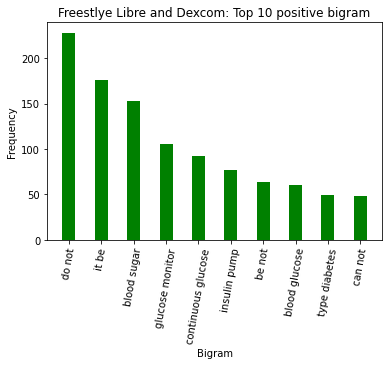

In [128]:
# Freestyle Libre & Dexcom positive bigram visualization
both_positive_most_common_bigram = positive_both_2ngram[:10]
frequency = both_positive_most_common_bigram['frequency']
label = both_positive_most_common_bigram['bigram']
plt.bar(label, frequency,
        width = 0.4, color='green')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.title('Freestlye Libre and Dexcom: Top 10 positive bigram')
plt.show()

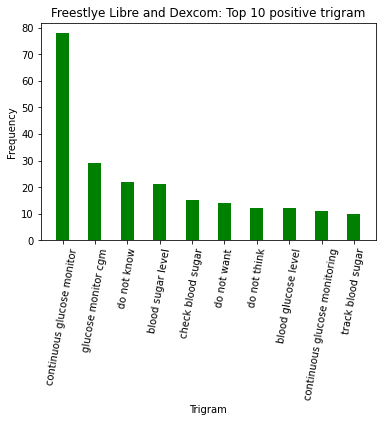

In [130]:
# Freestyle Libre & Dexcom positive bigram visualization
both_positive_most_common_trigram = positive_both_3ngram[:10]
frequency = both_positive_most_common_trigram['frequency']
label = both_positive_most_common_trigram['trigram']
plt.bar(label, frequency,
        width = 0.4, color='green')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.title('Freestlye Libre and Dexcom: Top 10 positive trigram')
plt.show()

### Negative Sentiments

In [102]:
# matrix of ngrams
negative_libre_2ngrams = c_2_vec.fit_transform(negative_libre['lemmatized_text'])
negative_libre_3ngrams = c_3_vec.fit_transform(negative_libre['lemmatized_text'])

# count frequency of ngrams
neg2_libre_count_values = negative_libre_2ngrams.toarray().sum(axis=0)
neg3_libre_count_values = negative_libre_3ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_2_vec.vocabulary_
vocab3 = c_3_vec.vocabulary_
negative_libre_2ngram = pd.DataFrame(sorted([(neg2_libre_count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

negative_libre_3ngram = pd.DataFrame(sorted([(neg3_libre_count_values[i],k) for k,i in vocab3.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

negative_libre_2ngram = negative_libre_2ngram.sort_values(by=['frequency'], ascending=False)
negative_libre_3ngram = negative_libre_3ngram.sort_values(by=['frequency'], ascending=False)

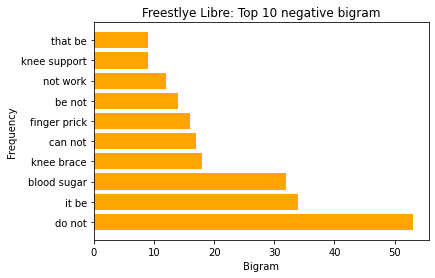

In [217]:
# Freestyle Libre negative bigram visualization
libre_negative_most_common_bigram = negative_libre_2ngram[:10]
frequency = libre_negative_most_common_bigram['frequency']
label = libre_negative_most_common_bigram['bigram']
plt.barh(label, frequency, color='orange')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
# plt.xticks(rotation=80)
plt.title('Freestlye Libre: Top 10 negative bigram')
plt.show()

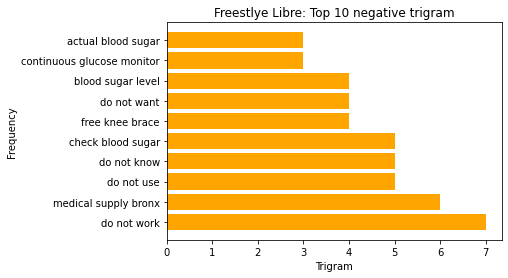

In [210]:
# Freestyle Libre negative trigram visualization
libre_negative_most_common_trigram = negative_libre_3ngram[:10]
frequency = libre_negative_most_common_trigram['frequency']
label = libre_negative_most_common_trigram['trigram']
plt.barh(label, frequency,color='orange')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Freestlye Libre: Top 10 negative trigram')
plt.show()

In [215]:
# negative_libre_words_filter = ['do not work', 'medical supply bronx']
# negative_libre['lemmatized_text']

In [105]:
# matrix of ngrams
negative_dexcom_2ngrams = c_2_vec.fit_transform(negative_dexcom['lemmatized_text'])
negative_dexcom_3ngrams = c_3_vec.fit_transform(negative_dexcom['lemmatized_text'])

# count frequency of ngrams
neg2_dexcom_count_values = negative_dexcom_2ngrams.toarray().sum(axis=0)
neg3_dexcom_count_values = negative_dexcom_3ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_2_vec.vocabulary_
vocab3 = c_3_vec.vocabulary_
negative_dexcom_2ngram = pd.DataFrame(sorted([(neg2_dexcom_count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

negative_dexcom_3ngram = pd.DataFrame(sorted([(neg3_dexcom_count_values[i],k) for k,i in vocab3.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

negative_dexcom_2ngram = negative_dexcom_2ngram.sort_values(by=['frequency'], ascending=False)
negative_dexcom_3ngram = negative_dexcom_3ngram.sort_values(by=['frequency'], ascending=False)

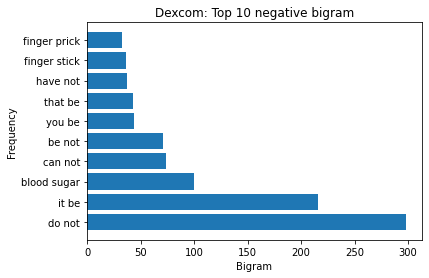

In [205]:
# Dexcom negative bigram visualization
dexcom_negative_most_common_bigram = negative_dexcom_2ngram[:10]
frequency = dexcom_negative_most_common_bigram['frequency']
label = dexcom_negative_most_common_bigram['bigram']
plt.barh(label, frequency)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Dexcom: Top 10 negative bigram')
plt.show()

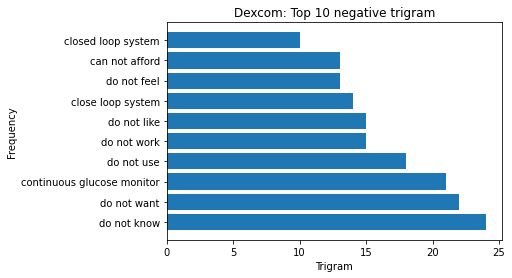

In [204]:
# Dexcom negative trigram visualization
dexcom_negative_most_common_trigram = negative_dexcom_3ngram[:10]
frequency = dexcom_negative_most_common_trigram['frequency']
label = dexcom_negative_most_common_trigram['trigram']
plt.barh(label, frequency)
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Dexcom: Top 10 negative trigram')
plt.show()

In [132]:
# matrix of ngrams
negative_both_2ngrams = c_2_vec.fit_transform(negative_both['lemmatized_text'])
negative_both_3ngrams = c_3_vec.fit_transform(negative_both['lemmatized_text'])

# count frequency of ngrams
neg2_both_count_values = negative_both_2ngrams.toarray().sum(axis=0)
neg3_both_count_values = negative_both_3ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_2_vec.vocabulary_
vocab3 = c_3_vec.vocabulary_
negative_both_2ngram = pd.DataFrame(sorted([(neg2_both_count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

negative_both_3ngram = pd.DataFrame(sorted([(neg3_both_count_values[i],k) for k,i in vocab3.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

negative_both_2ngram = negative_both_2ngram.sort_values(by=['frequency'], ascending=False)
negative_both_3ngram = negative_both_3ngram.sort_values(by=['frequency'], ascending=False)


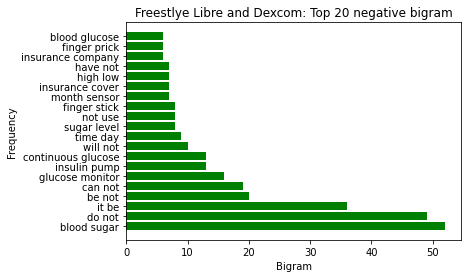

In [203]:
# Freestyle Libre and Dexcom negative bigram visualization
both_negative_most_common_bigram = negative_both_2ngram[:20]
frequency = both_negative_most_common_bigram['frequency']
label = both_negative_most_common_bigram['bigram']
plt.barh(label, frequency,color='green')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
# plt.xticks(rotation=80)
plt.title('Freestlye Libre and Dexcom: Top 20 negative bigram')
plt.show()

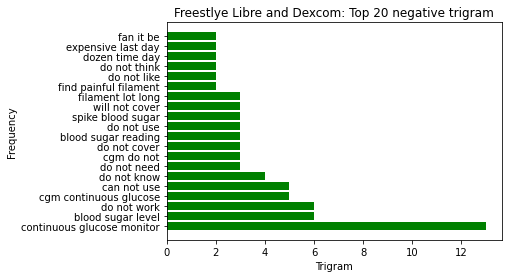

In [201]:
# Freestyle Libre and Dexcom negative trigram visualization
both_negative_most_common_trigram = negative_both_3ngram[:20]
frequency = both_negative_most_common_trigram['frequency']
label = both_negative_most_common_trigram['trigram']
plt.barh(label, frequency, color='green')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Freestlye Libre and Dexcom: Top 20 negative trigram')
plt.show()

### Neutral Sentiments

In [108]:
# matrix of ngrams
neutral_libre_2ngrams = c_2_vec.fit_transform(neutral_libre['lemmatized_text'])
neutral_libre_3ngrams = c_3_vec.fit_transform(neutral_libre['lemmatized_text'])

# count frequency of ngrams
neu2_libre_count_values = neutral_libre_2ngrams.toarray().sum(axis=0)
neu3_libre_count_values = neutral_libre_3ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_2_vec.vocabulary_
vocab3 = c_3_vec.vocabulary_
neutral_libre_2ngram = pd.DataFrame(sorted([(neu2_libre_count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

neutral_libre_3ngram = pd.DataFrame(sorted([(neu3_libre_count_values[i],k) for k,i in vocab3.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

neutral_libre_2ngram = neutral_libre_2ngram.sort_values(by=['frequency'], ascending=False)
neutral_libre_3ngram = neutral_libre_3ngram.sort_values(by=['frequency'], ascending=False)

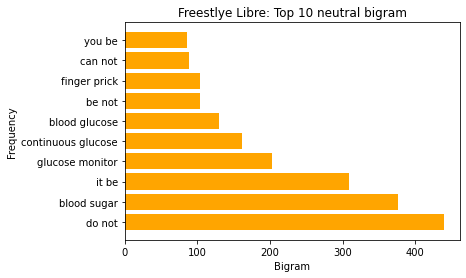

In [216]:
# Freestyle Libre neutral bigram visualization
libre_neutral_most_common_bigram = neutral_libre_2ngram[:10]
frequency = libre_neutral_most_common_bigram['frequency']
label = libre_neutral_most_common_bigram['bigram']
plt.barh(label, frequency,
         color='orange')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Freestlye Libre: Top 10 neutral bigram')
plt.show()

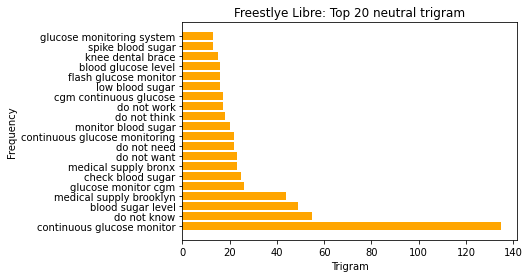

In [207]:
# Freestyle Libre neutral trigram visualization
libre_neutral_most_common_trigram = neutral_libre_3ngram[:20]
frequency = libre_neutral_most_common_trigram['frequency']
label = libre_neutral_most_common_trigram['trigram']
plt.barh(label, frequency, color='orange')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Freestlye Libre: Top 20 neutral trigram')
plt.show()

In [111]:
# matrix of ngrams
neutral_dexcom_2ngrams = c_2_vec.fit_transform(neutral_dexcom['lemmatized_text'])
neutral_dexcom_3ngrams = c_3_vec.fit_transform(neutral_dexcom['lemmatized_text'])

# count frequency of ngrams
neu2_dexcom_count_values = neutral_dexcom_2ngrams.toarray().sum(axis=0)
neu3_dexcom_count_values = neutral_dexcom_3ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_2_vec.vocabulary_
vocab3 = c_3_vec.vocabulary_
neutral_dexcom_2ngram = pd.DataFrame(sorted([(neu2_dexcom_count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

neutral_dexcom_3ngram = pd.DataFrame(sorted([(neu3_dexcom_count_values[i],k) for k,i in vocab3.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

neutral_dexcom_2ngram = neutral_dexcom_2ngram.sort_values(by=['frequency'], ascending=False)
neutral_dexcom_3ngram = neutral_dexcom_3ngram.sort_values(by=['frequency'], ascending=False)

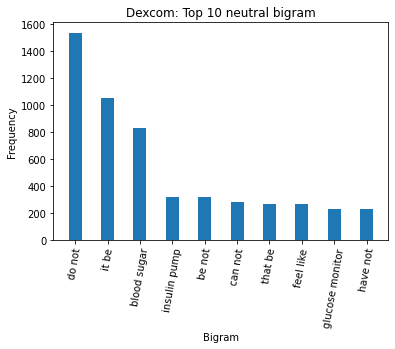

In [112]:
# Dexcom neutral bigram visualization
dexcom_neutral_most_common_bigram = neutral_dexcom_2ngram[:10]
frequency = dexcom_neutral_most_common_bigram['frequency']
label = dexcom_neutral_most_common_bigram['bigram']
plt.bar(label, frequency,
        width = 0.4)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.title('Dexcom: Top 10 neutral bigram')
plt.show()

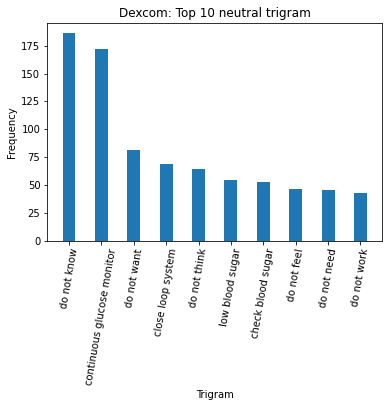

In [113]:
# Dexcom neutral trigram visualization
dexcom_neutral_most_common_trigram = neutral_dexcom_3ngram[:10]
frequency = dexcom_neutral_most_common_trigram['frequency']
label = dexcom_neutral_most_common_trigram['trigram']
plt.bar(label, frequency,
        width = 0.4)
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.title('Dexcom: Top 10 neutral trigram')
plt.show()

In [136]:
# matrix of ngrams
neutral_both_2ngrams = c_2_vec.fit_transform(neutral_both['lemmatized_text'])
neutral_both_3ngrams = c_3_vec.fit_transform(neutral_both['lemmatized_text'])

# count frequency of ngrams
neu2_both_count_values = neutral_both_2ngrams.toarray().sum(axis=0)
neu3_both_count_values = neutral_both_3ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_2_vec.vocabulary_
vocab3 = c_3_vec.vocabulary_
neutral_both_2ngram = pd.DataFrame(sorted([(neu2_both_count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})

neutral_both_3ngram = pd.DataFrame(sorted([(neu3_both_count_values[i],k) for k,i in vocab3.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

neutral_both_2ngram = neutral_both_2ngram.sort_values(by=['frequency'], ascending=False)
neutral_both_3ngram = neutral_both_3ngram.sort_values(by=['frequency'], ascending=False)


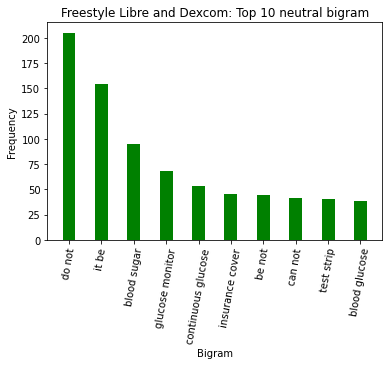

In [140]:
# Freestyle Libre and Dexcom neutral bigram visualization
both_neutral_most_common_bigram = neutral_both_2ngram[:10]
frequency = both_neutral_most_common_bigram['frequency']
label = both_neutral_most_common_bigram['bigram']
plt.bar(label, frequency,
        width = 0.4,color='green')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.title('Freestyle Libre and Dexcom: Top 10 neutral bigram')
plt.show()

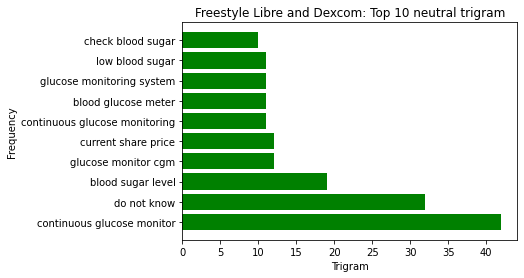

In [244]:
# Freestyle Libre and Dexcom neutral trigram visualization
both_neutral_most_common_trigram = neutral_both_3ngram[:10]
frequency = both_neutral_most_common_trigram['frequency']
label = both_neutral_most_common_trigram['trigram']
plt.barh(label, frequency,color='green')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
# plt.xticks(rotation=80)
plt.title('Freestyle Libre and Dexcom: Top 10 neutral trigram')
plt.show()